In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#importing Dataset
data = pd.read_csv('OnlineFraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Checking the info and making sure each data type is correct
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Stats Summary of the Dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Checking for Null
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Renaming the column type
data.rename(columns={'type': 'transactionType'}, inplace=True)


In [ ]:
#Checking the count of of each parameters in the column transactionType
data.transactionType.value_counts()

transactionType
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

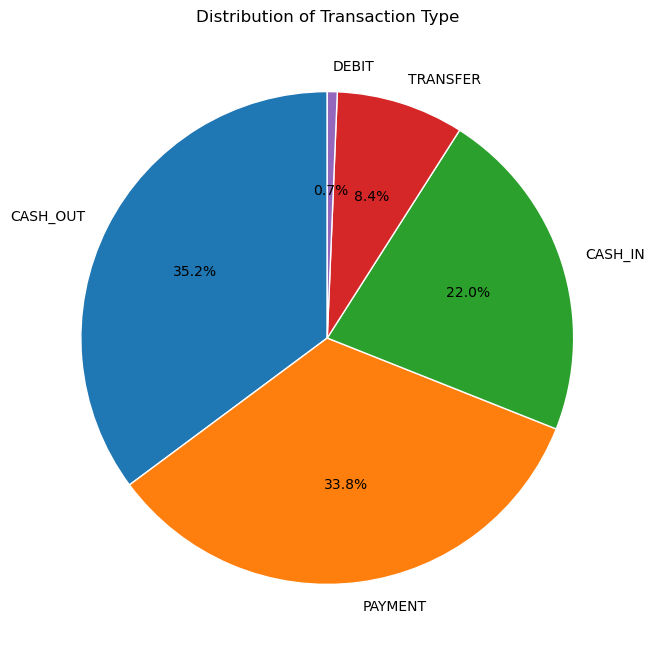

In [ ]:
# Calculate transaction type distribution
type_counts = data["transactionType"].value_counts()
transactions = type_counts.index
quantity = type_counts.values

# Creating a pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(quantity, labels=transactions, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Distribution of Transaction Type")
plt.gca().set_aspect('equal')  # Ensure the pie chart is a circle
plt.show()

In [ ]:
#Checking the features which are more correlated with isFraud
correlation = data.select_dtypes(include=['number']).corr()
print(correlation["isFraud"].sort_values(ascending=False))


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
#Converting the categorical data to numerical data using the MAPING method
data["transactionType"] = data["transactionType"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                                      "CASH_IN": 3, "TRANSFER": 4,
                                                      "DEBIT": 5 })

data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

data.head()

,step,transactionType,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [ ]:
#Slitting the dataset
from sklearn.model_selection import train_test_split
x = np.array(data[["transactionType", "amount", "oldbalanceOrg", "newbalanceOrig" ]])
y = np.array(data[["isFraud"]])


In [ ]:
#Training my model and printing model Accuracy
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier() 
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

score = model.score(xtest, ytest)
print(f"Model Accuracy: {score * 100:.2f}%")


Model Accuracy: 99.97%


In [ ]:
## 📊 Model Evaluation (Confusion Matrix & ROC Curve)


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# ✅ Predictions
y_pred = model.predict(xtest)
y_pred_proba = model.predict_proba(xtest)[:, 1]

# ✅ Confusion Matrix
cm = confusion_matrix(ytest, y_pred, labels=["No Fraud", "Fraud"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Fraud Detection")
plt.savefig("images/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# ✅ ROC Curve (positive class = "Fraud")
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba, pos_label="Fraud")
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend(loc="lower right")
plt.savefig("images/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()
